<a href="https://colab.research.google.com/github/tonyw54/GeorgeBrown/blob/main/Deep2_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview

We will be using Ultralytics' generic Yolo 11 model for training. This seems to be a very advanced, modern model. Ultralytics also provides a great amount of developer training documentation and videos, besides a free plan.

https://www.ultralytics.com/hub

# Setup

In [ ]:
import os
%pip install ultralytics
import ultralytics
ultralytics.checks()
from ultralytics import YOLO

Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 32.7/235.7 GB disk)


# First Experiment

## 1. Import Yolo11 Model

In [ ]:
model = YOLO('yolo11n.pt')  # load a pretrained Yolo 11 model from ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 262MB/s]


## 2. Download First Training Data Set

The training set is from RoboFlow. It contains bounding boxes, as required by yolo models.

https://universe.roboflow.com/ali-rostami/labeled-mri-brain-tumor-dataset/dataset/1

This is a 77 MB file, when downloaded. Copy it to this notebook and unzip it.

## 3. Unzip data

In [ ]:
!unzip Labeled_MRI_Brain_Tumor_Dataset.v1-version-1.yolov11.zip -d /content/

Archive:  Labeled_MRI_Brain_Tumor_Dataset.v1-version-1.yolov11.zip
  inflating: /content/README.dataset.txt  
  inflating: /content/README.roboflow.txt  
  inflating: /content/data.yaml      
   creating: /content/test/
   creating: /content/test/images/
 extracting: /content/test/images/Tr-gl_0016_jpg.rf.99746694ea97fe0b73108832b462d48e.jpg  
 extracting: /content/test/images/Tr-gl_0018_jpg.rf.7a670766b8083a1b516a49e241a636bc.jpg  
 extracting: /content/test/images/Tr-gl_0028_jpg.rf.8098b9737048aac0dccb1b7c45046894.jpg  
 extracting: /content/test/images/Tr-gl_0032_jpg.rf.e1e485b4f909d84c8e24cd26e0ad3c08.jpg  
 extracting: /content/test/images/Tr-gl_0035_jpg.rf.7a7c96ab2e6245cf42a0c86b97f81b3e.jpg  
 extracting: /content/test/images/Tr-gl_0037_jpg.rf.6ac80086817a5d840d3b634956299e40.jpg  
 extracting: /content/test/images/Tr-gl_0040_jpg.rf.4e8e95e2b510b798b62954aa8d3e1847.jpg  
 extracting: /content/test/images/Tr-gl_0042_jpg.rf.c825249fca17c0579976c6455ed0f64d.jpg  
 extracting: /con

## 4. Train First Model

In [ ]:
# Train the model
results = model.train(data='/content/data.yaml', epochs=10)  # train the model

In [ ]:
# Save the trained model to a file
model.save('yolo11brtr.pt')

# load a custom trained Yolo 11 model from ultralytics
#model = YOLO('/content/yolo11brtr.pt')

## 5. Data Predictions

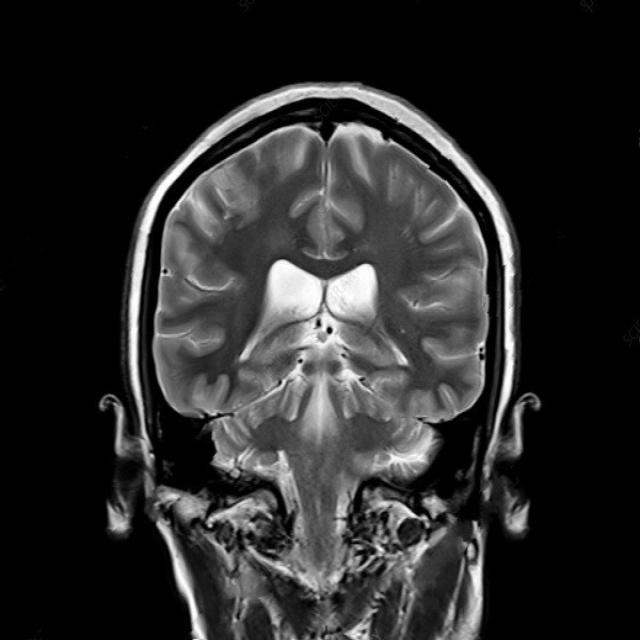


image 1/1 /content/valid/images/Tr-no_0196_jpg.rf.8b9d655f3bd4101c9de32ceb1c16e9f1.jpg: 640x640 1 No Tumor, 11.1ms
Speed: 1.8ms preprocess, 11.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Detected object: No Tumor


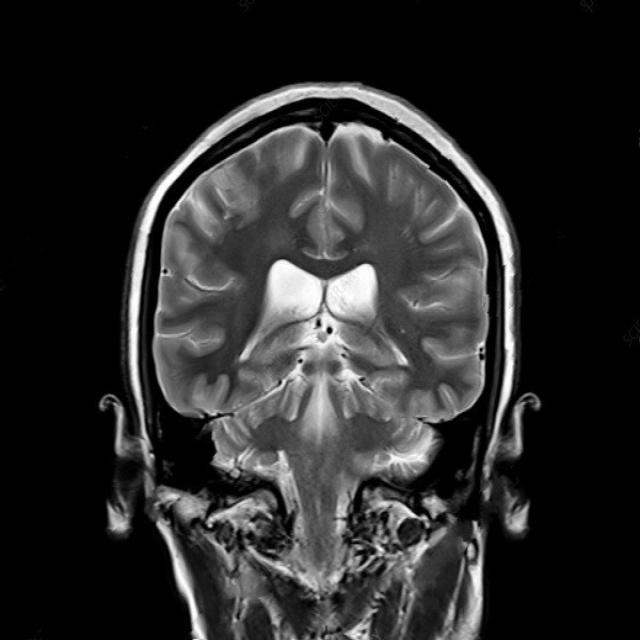


image 1/1 /content/valid/images/Tr-no_0196_jpg.rf.8b9d655f3bd4101c9de32ceb1c16e9f1.jpg: 640x640 1 No Tumor, 12.7ms
Speed: 1.6ms preprocess, 12.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Detected object: No Tumor


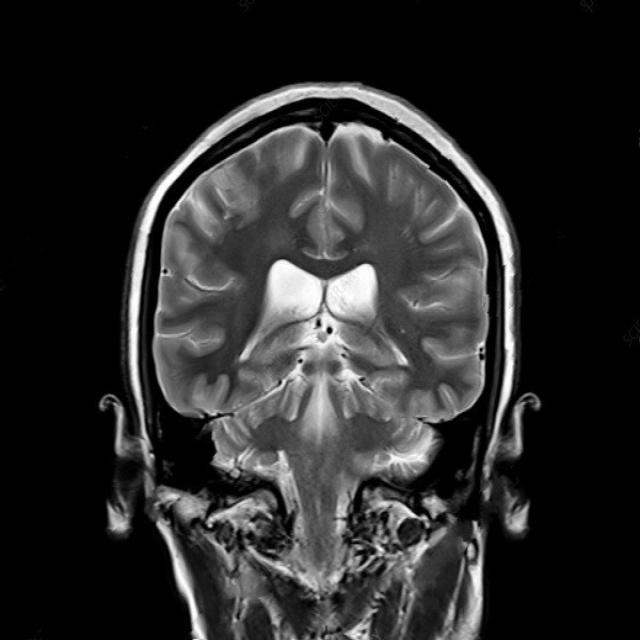


image 1/1 /content/valid/images/Tr-no_0196_jpg.rf.8b9d655f3bd4101c9de32ceb1c16e9f1.jpg: 640x640 1 No Tumor, 9.0ms
Speed: 1.4ms preprocess, 9.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Detected object: No Tumor
No image files found in the validation directory.


In [ ]:
from IPython.display import Image

# Assuming your validation images are in a folder named 'valid' within your dataset directory
valid_dir = '/content/valid/images'

# Get the list of image files in the validation directory
image_files = [f for f in os.listdir(valid_dir) if f.endswith('.jpg') or f.endswith('.png')]

if image_files:
  for i in range(3):  # Loop through the first 3 images
    first_image_path = os.path.join(valid_dir, image_files[3])

    from IPython.display import Image
    display(Image(filename=first_image_path, width=300))  # This will display the image
    # Run the model on the image
    results = model(first_image_path)

    for result in results:
        boxes = result.boxes  # Boxes object for detected objects
        for box in boxes:
            class_id = box.cls.cpu().numpy().astype(int)[0]  # Get the class ID
            # Assuming you have a class mapping (e.g., a list of class names)
            class_name = model.names[class_id]
            print(f"Detected object: {class_name}")
  else:
    print("No image files found in the validation directory.")

## 6. Cleanup

In [ ]:
import os
import shutil

# Delete folders if they exist
folders_to_delete = ['test', 'train', 'valid']
for folder in folders_to_delete:
  if os.path.exists(folder):
    shutil.rmtree(folder)

# Delete files if they exist
files_to_delete = ['Labeled_MRI_Brain_Tumor_Dataset.zip', 'README.dataset.txt', 'README.roboflow.txt', 'data.yaml']
for file in files_to_delete:
  if os.path.exists(file):
    os.remove(file)

# Second Experiment

For comparison, we train the new yolo 11 model on the dataset at

https://github.com/ultralytics/assets/releases/download/v0.0.0/brain-tumor.zip

After training, we compare the results to the previous dataset.

## 1. Download second training set

In [ ]:
!wget https://github.com/ultralytics/assets/releases/download/v0.0.0/brain-tumor.zip -P /content
!unzip /content/brain-tumor.zip -d /content/

## 2. Train and test the model

In [ ]:
# Load a model
model2 = YOLO("yolo11n.pt")  # load a pretrained model (recommended for training)

# Train the model
results = model2.train(data="brain-tumor.yaml", epochs=10, imgsz=640)

100%|██████████| 5.35M/5.35M [00:00<00:00, 165MB/s]

Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=brain-tumor.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, optimize=False, int8=False, dynamic

100%|██████████| 4.05M/4.05M [00:00<00:00, 146MB/s]
Unzipping /content/datasets/brain-tumor.zip to /content/datasets/brain-tumor...: 100%|██████████| 2217/2217 [00:00<00:00, 6374.66file/s]

Dataset download success ✅ (1.1s), saved to /content/datasets



100%|██████████| 755k/755k [00:00<00:00, 43.0MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/datasets/brain-tumor/train/labels... 878 images, 15 backgrounds, 0 corrupt: 100%|██████████| 893/893 [00:00<00:00, 1067.06it/s]

train: New cache created: /content/datasets/brain-tumor/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/datasets/brain-tumor/valid/labels... 223 images, 0 backgrounds, 0 corrupt: 100%|██████████| 223/223 [00:00<00:00, 905.63it/s]

val: New cache created: /content/datasets/brain-tumor/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.39G      1.288      3.766      1.206         12        640: 100%|██████████| 56/56 [00:12<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.20it/s]

                   all        223        241      0.418      0.213      0.197      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.37G      1.179      2.728      1.108         13        640: 100%|██████████| 56/56 [00:08<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.17it/s]

                   all        223        241      0.336      0.337      0.285      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.36G      1.192      2.338       1.12         13        640: 100%|██████████| 56/56 [00:08<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.77it/s]

                   all        223        241      0.445      0.744      0.457      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.37G      1.109      2.038      1.095         14        640: 100%|██████████| 56/56 [00:08<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.10it/s]

                   all        223        241      0.442      0.731      0.444      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.37G      1.082      1.818      1.064         13        640: 100%|██████████| 56/56 [00:08<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.17it/s]


                   all        223        241      0.436      0.783      0.466      0.323

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.37G       1.05      1.604      1.046         17        640: 100%|██████████| 56/56 [00:08<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.10it/s]


                   all        223        241      0.459      0.836      0.487      0.351

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.37G      1.016       1.49      1.034         15        640: 100%|██████████| 56/56 [00:08<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.26it/s]


                   all        223        241      0.464      0.848      0.447      0.313

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.37G     0.9684      1.397      1.022         13        640: 100%|██████████| 56/56 [00:08<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.34it/s]


                   all        223        241      0.444       0.85      0.463      0.326

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.37G     0.9514      1.329      1.011         13        640: 100%|██████████| 56/56 [00:08<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.11it/s]

                   all        223        241      0.476      0.853      0.485      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.37G     0.8964      1.289     0.9896         12        640: 100%|██████████| 56/56 [00:08<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.27it/s]

                   all        223        241      0.467      0.861      0.468      0.337



10 epochs completed in 0.033 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.48it/s]


                   all        223        241       0.46      0.836      0.487      0.351
              negative        142        154      0.586      0.799      0.565      0.405
              positive         81         87      0.334      0.874      0.409      0.297
Speed: 0.4ms preprocess, 2.8ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/train


In [ ]:
# Save the trained model to a file
model2.save('yolo11brtr2.pt')

# load a custom trained Yolo 11 model from ultralytics
model = YOLO('yolo11brtr2.pt')


image 1/1 /content/tumor.jpeg: 640x608 1 negative, 1 positive, 49.8ms
Speed: 4.6ms preprocess, 49.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 608)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([1., 0.], device='cuda:0')
conf: tensor([0.5197, 0.4941], device='cuda:0')
data: tensor([[4.4950e+02, 2.2852e+02, 5.6124e+02, 3.6767e+02, 5.1965e-01, 1.0000e+00],
        [4.4610e+02, 2.2858e+02, 5.6324e+02, 3.6796e+02, 4.9410e-01, 0.0000e+00]], device='cuda:0')
id: None
is_track: False
orig_shape: (744, 675)
shape: torch.Size([2, 6])
xywh: tensor([[505.3700, 298.0954, 111.7423, 139.1518],
        [504.6711, 298.2706, 117.1353, 139.3774]], device='cuda:0')
xywhn: tensor([[0.7487, 0.4007, 0.1655, 0.1870],
        [0.7477, 0.4009, 0.1735, 0.1873]], device='cuda:0')
xyxy: tensor([[449.4988, 228.5195, 561.2411, 367.6713],
        [446.1035, 228.5818, 563.2388, 367.9593]], device='cuda:0')
xyxyn: tensor([[0.6659, 0.3071, 0.8315, 0.4942],
        [0.6609, 0.

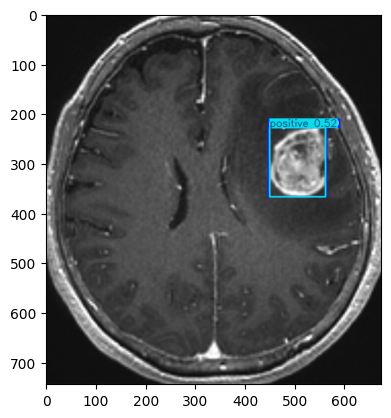

In [ ]:
# Load the saved model
model2 = YOLO('yolo11brtr2.pt')

# Run inference on the image
results = model2('/content/tumor.jpeg')

# Display the results
for r in results:
    print(r.boxes)
    im_array = r.plot()  # plot a BGR numpy array of predictions
    # Convert BGR to RGB
    import cv2
    im_array = cv2.cvtColor(im_array, cv2.COLOR_BGR2RGB)
    import matplotlib.pyplot as plt
    plt.imshow(im_array)
    plt.show()

# Cleanup

In [ ]:
import shutil
import os

# Delete folders and their contents
folders_to_delete = ['datasets', 'runs', 'train', 'valid']
for folder in folders_to_delete:
    if os.path.exists(folder):
        shutil.rmtree(folder)

# Third Experiment

## 1. Download Image Dataset

Use the parkinsons dataset at https://huggingface.co/datasets/PD-Project/Parkinsons-Disease-MRI-Dataset. In general, this dataset takes a long time to load. It is better to use git to download the files, zip up the file folders, and manually copy this zip file to the notebook. Use the git commands for this to download the dataset.

`git lfs install`

`git clone https://huggingface.co/datasets/PD-Project/Parkinsons-Disease-MRI-Dataset`


After downloading the Parkinsons-Disease-MRI-Dataset, just zip up the file and drop the zipped file into colab.

In [ ]:
#import locale
#import os
#import shutil

#def getpreferredencoding(do_setlocale = True):
#    return "UTF-8"

#locale.getpreferredencoding = getpreferredencoding

#!pip install datasets

#from datasets import load_dataset

#dataset = load_dataset("PD-Project/Parkinsons-Disease-MRI-Dataset", split="train")

# Print the first example
#print(dataset[0])

In [ ]:
! unzip Parkinsons-Disease-MRI-Dataset.zip

Streaming output truncated to the last 5000 lines.
   creating: Parkinsons-Disease-MRI-Dataset/.git/refs/heads/
  inflating: Parkinsons-Disease-MRI-Dataset/.git/refs/heads/main  
   creating: Parkinsons-Disease-MRI-Dataset/.git/refs/remotes/
   creating: Parkinsons-Disease-MRI-Dataset/.git/refs/remotes/origin/
  inflating: Parkinsons-Disease-MRI-Dataset/.git/refs/remotes/origin/HEAD  
   creating: Parkinsons-Disease-MRI-Dataset/.git/refs/tags/
  inflating: Parkinsons-Disease-MRI-Dataset/.gitattributes  
   creating: Parkinsons-Disease-MRI-Dataset/Normal/
  inflating: Parkinsons-Disease-MRI-Dataset/Normal/ep2d_diff_3scan_trace_p2_ADC_DFC_001.png  
  inflating: Parkinsons-Disease-MRI-Dataset/Normal/ep2d_diff_3scan_trace_p2_ADC_DFC_002.png  
  inflating: Parkinsons-Disease-MRI-Dataset/Normal/ep2d_diff_3scan_trace_p2_ADC_DFC_003.png  
  inflating: Parkinsons-Disease-MRI-Dataset/Normal/ep2d_diff_3scan_trace_p2_ADC_DFC_004.png  
  inflating: Parkinsons-Disease-MRI-Dataset/Normal/ep2d_diff_3s

## 2. Save file names to a dataframe

In [ ]:
import os
import pandas as pd

df = pd.DataFrame(columns=['id', 'filename', 'label'])

i = 1
for filename in os.listdir('/content/Parkinsons-Disease-MRI-Dataset/Normal'):
  df = pd.concat([df, pd.DataFrame({'id': [i], 'filename': [filename], 'label': [0]})], ignore_index=True)
  i += 1

for filename in os.listdir('/content/Parkinsons-Disease-MRI-Dataset/PD'):
  df = pd.concat([df, pd.DataFrame({'id': [i], 'filename': [filename], 'label': [1]})], ignore_index=True)
  i += 1

df = df[~df['filename'].str.endswith('.txt')]

## 3. Shuffle image files

In [ ]:
import random

# Set a random seed for reproducibility
random.seed(42)  # You can choose any integer as the seed

# Shuffle the rows of the DataFrame
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Split the DataFrame into training and testing sets
train_size = int(0.8 * len(df))
train_df = df[:train_size]
test_df = df[train_size:]

In [ ]:
train_df.to_csv('train_data.csv', index=False)
test_df.to_csv('test_data.csv', index=False)

## 4. Copy files to train folders

In [ ]:
import shutil
import os

# Create the train folder if it doesn't exist
if not os.path.exists('/content/train'):
  os.makedirs('/content/train')

if not os.path.exists('/content/test'):
  os.makedirs('/content/test')

def empty_directory(directory):
  """Empties the specified directory by deleting all its contents."""
  for filename in os.listdir(directory):
    file_path = os.path.join(directory, filename)
    try:
      if os.path.isfile(file_path) or os.path.islink(file_path):
        os.unlink(file_path)
      elif os.path.isdir(file_path):
        shutil.rmtree(file_path)
    except Exception as e:
      print('Failed to delete %s. Reason: %s' % (file_path, e))


# Empty the directories if they exist
if os.path.exists('/content/train'):
  empty_directory('/content/train')

if os.path.exists('/content/test'):
  empty_directory('/content/test')

In [ ]:
train_df_label_true = train_df[train_df['label'] == 0]
train_df_label_false = train_df[train_df['label'] == 1]

test_df_label_true = test_df[test_df['label'] == 0]
test_df_label_false = test_df[test_df['label'] == 1]

In [ ]:
def count_files_in_directory(directory):
  count = 0
  for _, _, files in os.walk(directory):
    count += len(files)
  return count

In [ ]:
import shutil

for index, row in train_df_label_true.iterrows():
  source_file_path = os.path.join('/content/Parkinsons-Disease-MRI-Dataset/Normal', row['filename'])
  destination_file_path = os.path.join('/content/train', row['filename'])
  if os.path.exists(source_file_path):
    shutil.copy(source_file_path, destination_file_path)

for index, row in train_df_label_false.iterrows():
  source_file_path = os.path.join('/content/Parkinsons-Disease-MRI-Dataset/PD', row['filename'])
  destination_file_path = os.path.join('/content/train', row['filename'])
  if os.path.exists(source_file_path):
    shutil.copy(source_file_path, destination_file_path)

for index, row in test_df_label_true.iterrows():
  source_file_path = os.path.join('/content/Parkinsons-Disease-MRI-Dataset/Normal', row['filename'])
  destination_file_path = os.path.join('/content/test', row['filename'])
  if os.path.exists(source_file_path):
    shutil.copy(source_file_path, destination_file_path)

for index, row in test_df_label_false.iterrows():
  source_file_path = os.path.join('/content/Parkinsons-Disease-MRI-Dataset/PD', row['filename'])
  destination_file_path = os.path.join('/content/test', row['filename'])
  if os.path.exists(source_file_path):
    shutil.copy(source_file_path, destination_file_path)


In [ ]:
count_files_in_directory('/content/train') + count_files_in_directory('/content/test')

4990

## 5. Setup cuda

In [ ]:
import os
import pandas as pd
import numpy as np
from PIL import Image
import torch
import timm
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

In [ ]:
# Set device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


## 6. Setup data loaders

In [ ]:
class MRIImageDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.data = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.data.iloc[idx, 1])
        # Open as grayscale (mode='L')
        image = Image.open(img_name).convert('L')
        # Stack the grayscale image 3 times to create 3 channels
        image = np.stack([np.array(image)] * 3, axis=-1)
        image = Image.fromarray(image.astype('uint8'))
        label = self.data.iloc[idx, 2]
        if isinstance(label, str):
            label = int(label)  # or any appropriate conversion logic

        label = torch.tensor(label, dtype=torch.long)

        if self.transform:
            image = self.transform(image)

        return image, label

In [ ]:
# Define transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),  # Add horizontal flip
    transforms.RandomRotation(10),  # Add random rotation
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Set up the dataset and dataloader
train_dataset = MRIImageDataset(
    csv_file='train_data.csv',
    root_dir='train',
    transform=transform
)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)

val_dataset = MRIImageDataset(
    csv_file='test_data.csv',
    root_dir='test',
    transform=transform
)

val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)


## 7. Setup the trainable model

In [ ]:
import timm

def setup_model():
    # Create the model
    # model = timm.create_model('efficientnetv2_rw_s', pretrained=True, num_classes=2)
    model = timm.create_model('efficientnetv2_rw_t', pretrained=True, num_classes=2)
    # model = timm.create_model('efficientnetv2_rw_m', pretrained=True, num_classes=2)

    # Freeze all parameters first
    for param in model.parameters():
        param.requires_grad = False

    # Get list of all parameters
    all_params = list(model.named_parameters())

    # Calculate number of layers to unfreeze (last 4)
    num_layers_to_train = 4

    # Unfreeze the last num_layers_to_train layers
    for name, param in all_params[-num_layers_to_train:]:
        param.requires_grad = True
        print(f"Unfreezing layer: {name}")

    # Print total number of trainable parameters
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    total_params = sum(p.numel() for p in model.parameters())
    print(f"Trainable parameters: {trainable_params:,} / {total_params:,}")

    model.classifier.add_module('dropout', torch.nn.Dropout(0.2)) # Adjust the dropout probability (e.g., 0.2, 0.5)
    return model.to(device)

# Create and set up the model
model = setup_model()

# Use a smaller learning rate since we're only training a few layers
optimizer = torch.optim.AdamW(filter(lambda p: p.requires_grad, model.parameters()), lr=0.0001, weight_decay=0.001)  # Add weight decay

# Define the loss function and optimizer
criterion = torch.nn.CrossEntropyLoss()
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.1, patience=2, verbose=True)
model = model.to(device)


model.safetensors:   0%|          | 0.00/55.1M [00:00<?, ?B/s]

Unfreezing layer: bn2.weight
Unfreezing layer: bn2.bias
Unfreezing layer: classifier.weight
Unfreezing layer: classifier.bias
Trainable parameters: 4,098 / 12,626,438


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


## 8. Define training method

In [ ]:
# Training loop
def train_epoch(model, train_loader, criterion, optimizer):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100 * correct / total
    return epoch_loss, epoch_acc

## 9. Define validation method

In [ ]:
# Validation loop
def validate(model, val_loader, criterion):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss = running_loss / len(val_loader)
    val_acc = 100 * correct / total
    return val_loss, val_acc


## 10. Run training loop

Epoch [1/20]
Train Loss: 1.3840, Train Acc: 59.74%
Val Loss: 1.2876, Val Acc: 64.03%
--------------------------------------------------
Epoch [2/20]
Train Loss: 0.9565, Train Acc: 70.57%
Val Loss: 0.7720, Val Acc: 76.55%
--------------------------------------------------
Epoch [3/20]
Train Loss: 0.7033, Train Acc: 76.98%
Val Loss: 1.2617, Val Acc: 81.96%
--------------------------------------------------
Epoch [4/20]
Train Loss: 0.5543, Train Acc: 81.89%
Val Loss: 0.5449, Val Acc: 82.46%
--------------------------------------------------
Epoch [5/20]
Train Loss: 0.4787, Train Acc: 84.67%
Val Loss: 0.5687, Val Acc: 86.37%
--------------------------------------------------
Epoch [6/20]
Train Loss: 0.3990, Train Acc: 87.35%
Val Loss: 0.3868, Val Acc: 88.88%
--------------------------------------------------
Epoch [7/20]
Train Loss: 0.3705, Train Acc: 88.68%
Val Loss: 0.5327, Val Acc: 89.88%
--------------------------------------------------
Epoch [8/20]
Train Loss: 0.3337, Train Acc: 90.2

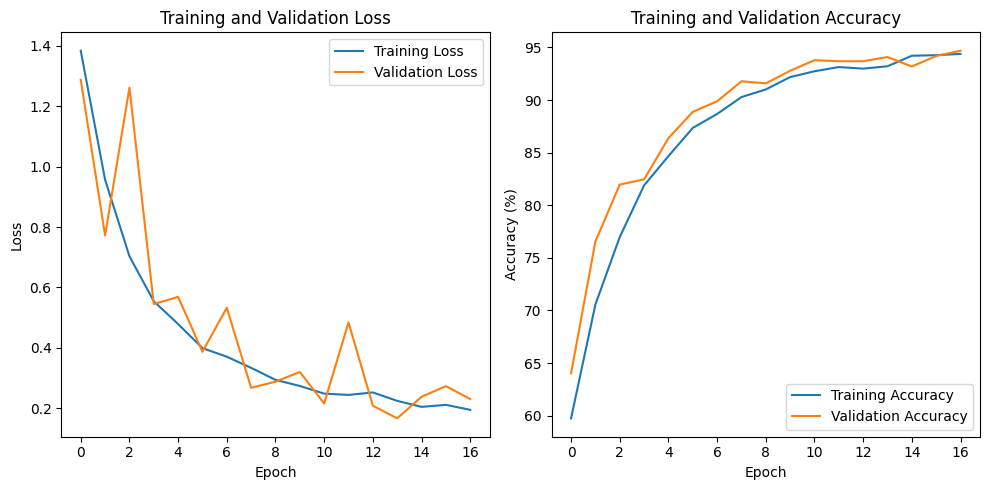

In [ ]:
import matplotlib.pyplot as plt

# Initialize lists to store metrics
train_losses = []
val_losses = []
train_accs = []
val_accs = []

early_stopping_counter = 0
patience = 3  # Number of epochs to wait for improvement
best_val_loss = float('inf')  # Initialize with a very large value

num_epochs = 20
best_val_acc = 0.0

for epoch in range(num_epochs):
    # Train
    train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer)
    train_losses.append(train_loss)
    train_accs.append(train_acc)

    # Validate
    val_loss, val_acc = validate(model, val_loader, criterion)
    val_losses.append(val_loss)
    val_accs.append(val_acc)

    # Update learning rate
    scheduler.step(val_acc)

    # Save best model
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), 'best_model.pth')

    # Early stopping check
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        early_stopping_counter = 0
        # You might also want to save the best model here:
        # torch.save(model.state_dict(), 'best_model.pth')
    else:
        early_stopping_counter += 1
        if early_stopping_counter >= patience:
            print(f"Early stopping triggered at epoch {epoch + 1}")
            break  # Exit the training loop

    # Print metrics
    print(f'Epoch [{epoch+1}/{num_epochs}]')
    print(f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%')
    print(f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')
    print('-' * 50)

print(f'Best validation accuracy: {best_val_acc:.2f}%')

# Plotting
plt.figure(figsize=(10, 5))

# Plot losses
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot accuracies
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.plot(train_accs, label='Training Accuracy')
plt.plot(val_accs, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()  # Adjust subplot params for a tight layout
plt.show()

Unfreezing layer: bn2.weight
Unfreezing layer: bn2.bias
Unfreezing layer: classifier.weight
Unfreezing layer: classifier.bias
Trainable parameters: 4,098 / 12,626,438


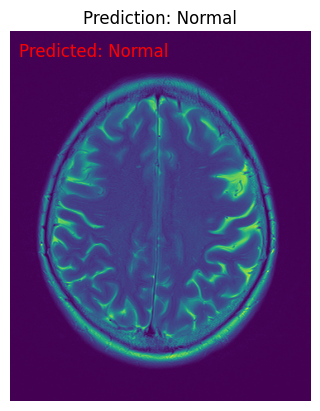

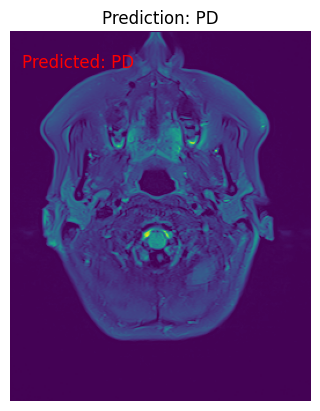

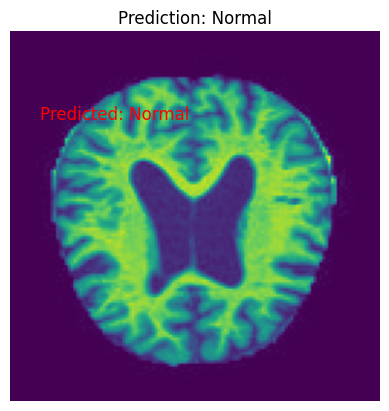

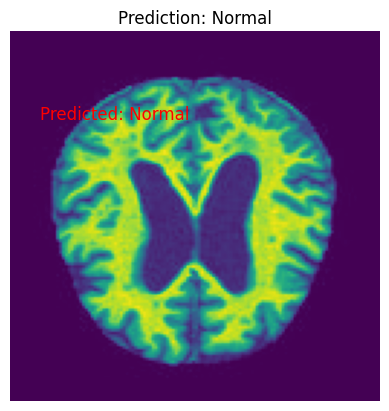

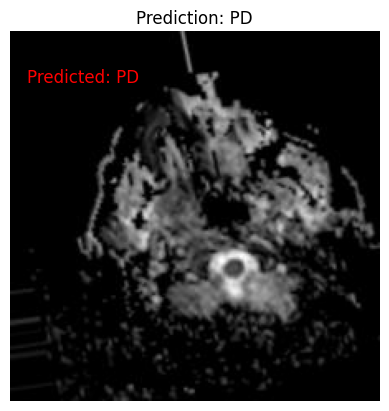

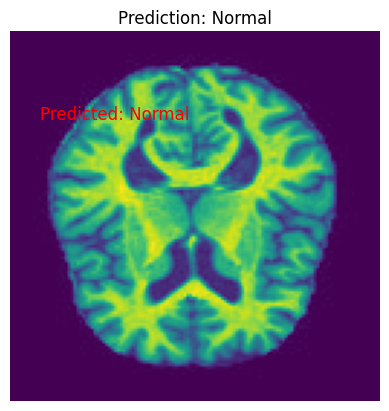

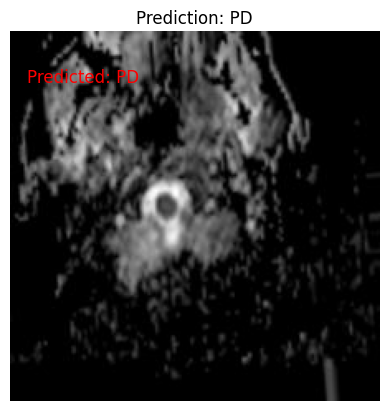

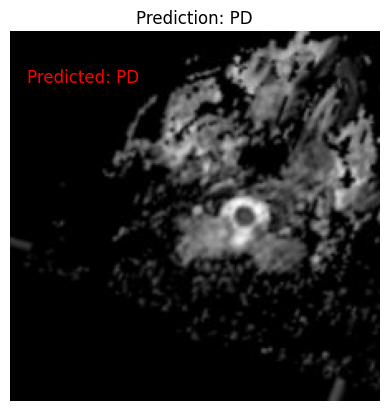

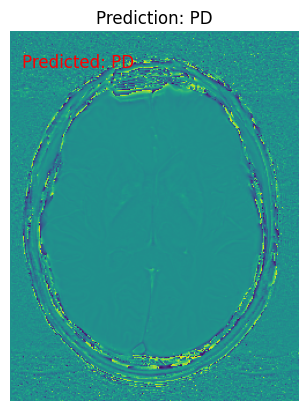

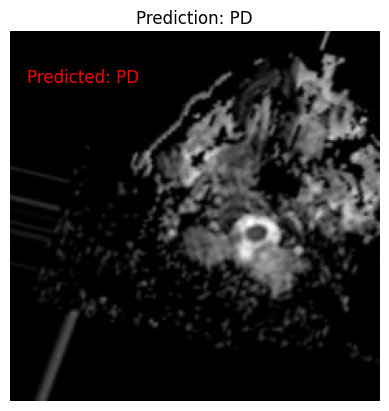

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Assuming 'best_model.pth' and the image directory exist
model = setup_model()  # Assuming setup_model() is defined as in the previous code
model.load_state_dict(torch.load('best_model.pth'))
model.eval()

image_dir = '/content/test'  # Replace with your actual image directory

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

cnt = 0
for filename in os.listdir(image_dir):
    cnt += 1
    if cnt > 10:
        break
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        img_path = os.path.join(image_dir, filename)
        img = Image.open(img_path).convert('L')
        img = np.stack([np.array(img)] * 3, axis=-1)
        img = Image.fromarray(img.astype('uint8'))
        img = transform(img).unsqueeze(0).to(device)  # Add batch dimension

        with torch.no_grad():
            outputs = model(img)
            _, predicted = torch.max(outputs, 1)

        # Get the predicted class label
        predicted_label = "Normal" if predicted.item() == 0 else "PD"  # Adjust labels if necessary

        plt.figure()
        plt.imshow(Image.open(img_path))
        plt.title(f"Prediction: {predicted_label}")
        plt.axis('off')

        # Add text to display the prediction
        plt.text(10, 30, f"Predicted: {predicted_label}", color='red', fontsize=12)  # Adjust position and style as needed

        plt.show()

# Fourth Experiment: Alzheimer Prediction

## 1. First Dataset (contains Alzheimers)

## 2. Second Dataset: no Alzheimers

In [ ]:
!pip install kaggle

# Assuming you have your kaggle.json in /content/kaggle.json
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d uraninjo/augmented-alzheimer-mri-dataset
!unzip augmented-alzheimer-mri-dataset.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/OriginalDataset/NonDemented/31 (10).jpg  
  inflating: /content/OriginalDataset/NonDemented/31 (100).jpg  
  inflating: /content/OriginalDataset/NonDemented/31 (11).jpg  
  inflating: /content/OriginalDataset/NonDemented/31 (12).jpg  
  inflating: /content/OriginalDataset/NonDemented/31 (13).jpg  
  inflating: /content/OriginalDataset/NonDemented/31 (14).jpg  
  inflating: /content/OriginalDataset/NonDemented/31 (15).jpg  
  inflating: /content/OriginalDataset/NonDemented/31 (16).jpg  
  inflating: /content/OriginalDataset/NonDemented/31 (17).jpg  
  inflating: /content/OriginalDataset/NonDemented/31 (18).jpg  
  inflating: /content/OriginalDataset/NonDemented/31 (19).jpg  
  inflating: /content/OriginalDataset/NonDemented/31 (2).jpg  
  inflating: /content/OriginalDataset/NonDemented/31 (20).jpg  
  inflating: /content/OriginalDataset/NonDemented/31 (21).jpg  
  inflating: /content/OriginalDataset/NonDemented/31 

In [ ]:
!kaggle datasets download -d pranavraikokte/covid19-image-dataset

Dataset URL: https://www.kaggle.com/datasets/pranavraikokte/covid19-image-dataset
License(s): CC-BY-SA-4.0
 99% 156M/158M [00:05<00:00, 29.7MB/s]
100% 158M/158M [00:05<00:00, 29.1MB/s]


In [ ]:
#Unzipping the zipfile of images
import zipfile

data_zip = zipfile.ZipFile('/content/covid19-image-dataset.zip')
data_zip.extractall()
data_zip.close()

In [ ]:
#Create seperate directories for training and testing images.

train_dir = '/content/AugmentedAlzheimerDataset/'
test_dir = '/content/OriginalDataset'

In [ ]:
#Import all the required libraries for data pre-processing and training.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers

In [ ]:
#Create instances of ImageDataGenerator by setting a rescale value and validation split.

train_datagen = ImageDataGenerator(rescale = 1/255. , validation_split = 0.2)
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [ ]:
train_data = train_datagen.flow_from_directory(train_dir ,
                                               target_size = (224 , 224),    #Set image size.
                                               batch_size = 32,              #Set appropriate batch size to avoid overfitting.
                                               class_mode = 'categorical',   #Set type of labels.
                                               subset = 'training')

valid_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224 , 224),
                                               batch_size = 32,
                                               class_mode = 'categorical',
                                               subset = 'validation')

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224 , 224),         #Images from the OriginalDataset directory to be used for testing only
                                             batch_size = 32,
                                             class_mode = 'categorical')

Found 27188 images belonging to 4 classes.
Found 6796 images belonging to 4 classes.
Found 6400 images belonging to 4 classes.


In [ ]:
#Define a function to plot the loss and accuracy curves of model training for better visualization.

def loss_and_accuracy(history):

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.plot(epochs , loss , label = 'Training Loss')
  plt.plot(epochs , val_loss , label = 'Validation Loss')            #Loss curve
  plt.title('Loss Curve')
  plt.xlabel('epochs')
  plt.legend()
  plt.savefig('Loss_Curve.jpg')

  plt.figure()

  plt.plot(epochs , accuracy , label = 'training_accuracy')
  plt.plot(epochs , val_accuracy , label = 'validation_accuracy')    #Accuracy curve
  plt.title('Accuracy Curve')
  plt.yticks([0,0.2,0.4,0.6,0.8,1])
  plt.xlabel('epochs')
  plt.legend()
  plt.savefig('Accuracy_Curve.jpg')

In [ ]:
#Give the classnames as a list
classnames = ['Mild Demented' , 'Moderate Demented' , 'Non-Demented' , 'Very Mild Demented']

In [ ]:
#Define a function to prepare an image for prediction

def image_prep(filename , img_size = 224):
  #Read the image from filename
  image = tf.io.read_file(filename)
  #Decode the image into its RGB channels
  image = tf.image.decode_image(image , channels = 3)
  #Resize the image
  image = tf.image.resize(image , size = [img_size , img_size])
  #Rescale
  image = image/255.

  return image

In [ ]:
#Define a function to make predictions on the prepared images
#Image along with the classified label is shown as output

def make_predictions(model , filename , classnames):
  #Load the image
  image = image_prep(filename)
  #Run the model on the image
  pred = model.predict(tf.expand_dims(image , axis=0))
  #Zero down on the class
  pred_class = classnames[tf.argmax(tf.round(pred)[0])]
  #Show the image and the label
  plt.imshow(image)
  plt.title(f'Predicted class: {pred_class}')
  plt.axis(False)

In [ ]:
#Create an EarlyStopping callback method that stops training when accuracy does not improve.

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy' , patience=3)

In [ ]:
model_1 = tf.keras.Sequential([
    layers.Conv2D(128 , 2 , activation = 'relu'),
    layers.MaxPool2D(),
    layers.Conv2D(128 , 2 , activation = 'relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(4 , activation = 'softmax')
])

In [ ]:
model_1.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [ ]:
history_1 = model_1.fit(train_data,
                        epochs = 50,
                        steps_per_epoch = int(0.1*len(train_data)),
                        validation_data = valid_data,
                        callbacks = [callback],
                        verbose = 0)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


In [ ]:
len(history_1.history['loss'])

27

In [ ]:
model_1.evaluate(train_data)

850/850 ━━━━━━━━━━━━━━━━━━━━ 35s 41ms/step - accuracy: 0.8904 - loss: 0.3063


[0.31016626954078674, 0.8893629312515259]

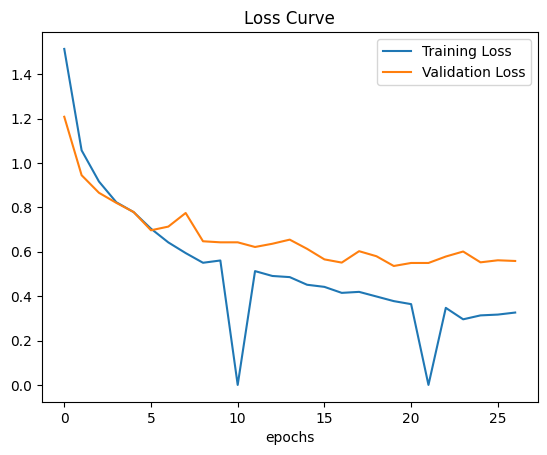

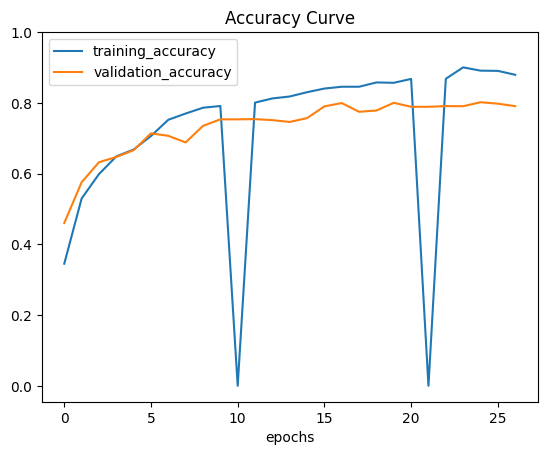

In [ ]:
loss_and_accuracy(history = history_1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


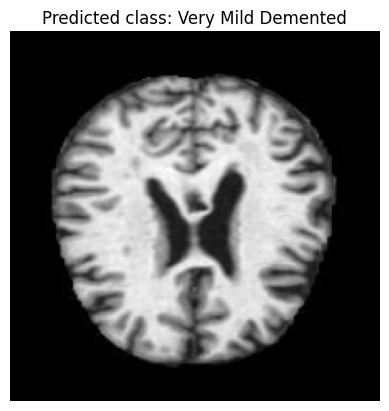

In [ ]:
make_predictions(model_1 , '/content/OriginalDataset/VeryMildDemented/26 (45).jpg' , classnames )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


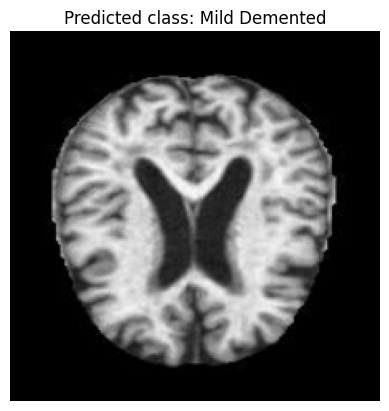

In [ ]:
make_predictions(model_1 , '/content/OriginalDataset/MildDemented/26.jpg' , classnames )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


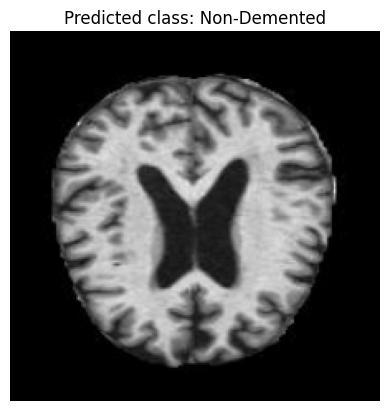

In [ ]:
make_predictions(model_1 , '/content/OriginalDataset/NonDemented/26 (75).jpg' , classnames )